### Лабораторная работа №2
#### Классификация

Датасет **Car Accidents in Brazil (2017-2023)** https://www.kaggle.com/datasets/mlippo/car-accidents-in-brazil-2017-2023

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
df_orig = pd.read_csv("datasets/accidents_2017_to_2023_english.csv")

In [3]:
df_orig.describe()

,road_id,people,deaths,slightly_injured,severely_injured,uninjured,ignored,total_injured,vehicles_involved,latitude,longitude
count,462162.000000,463152.000000,463152.000000,463152.000000,463152.000000,463152.000000,463152.000000,463152.000000,463152.000000,4.631520e+05,4.631520e+05
mean,213.432900,2.362373,0.079235,0.835469,0.259530,1.044070,0.144069,1.094999,1.645725,-2.343287e+03,-8.924977e+03
std,130.757607,1.924801,0.332169,1.075275,0.602814,1.502419,0.438168,1.205351,0.731394,1.519113e+06,5.903043e+06
min,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.033383e+09,-4.016764e+09
25%,101.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-2.533123e+01,-5.030294e+01
50%,163.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,-2.042034e+01,-4.780831e+01
75%,324.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,-1.282657e+01,-4.264249e+01
max,498.000000,80.000000,21.000000,61.000000,31.000000,73.000000,54.000000,66.000000,23.000000,1.630000e+02,7.170000e+02


In [4]:
df_orig.head(10)


,inverse_data,week_day,hour,state,road_id,km,city,cause_of_accident,type_of_accident,victims_condition,...,slightly_injured,severely_injured,uninjured,ignored,total_injured,vehicles_involved,latitude,longitude,regional,police_station
0,2017-01-01,sunday,01:45:00,RS,116.0,"34,9",VACARIA,Mechanical loss/defect of vehicle,Rear-end collision,With injured victims,...,4,0,2,0,4,2,-28.50712,-50.94118,SPRF-RS,DEL05-RS
1,2017-01-01,sunday,01:00:00,PR,376.0,636,TIJUCAS DO SUL,Incompatible velocity,Run-off-road,With dead victims,...,0,0,1,0,0,2,-25.75400,-49.12660,SPRF-PR,DEL01-PR
2,2017-01-01,sunday,04:40:00,BA,101.0,65,ENTRE RIOS,Driver was sleeping,Head-on collision,With dead victims,...,1,1,2,0,2,2,-11.96180,-38.09530,SPRF-BA,DEL01-BA
3,2017-01-01,sunday,06:30:00,PA,316.0,"72,5",CASTANHAL,Driver's lack of attention to conveyance,Side impact collision,With dead victims,...,0,0,3,0,0,3,-1.28998,-47.83483,SPRF-PA,DEL01-PA
4,2017-01-01,sunday,09:00:00,GO,20.0,"220,5",POSSE,Road's defect,Collision with fixed object,With injured victims,...,2,1,0,0,3,1,-14.14221,-46.32259,SPRF-DF,DEL02-DF
5,2017-01-01,sunday,07:40:00,RN,405.0,30,MOSSORO,Alcohol consumption,Head-on collision,With dead victims,...,0,0,1,0,0,2,-5.31360,-37.56900,SPRF-RN,DEL04-RN
6,2017-01-01,sunday,10:35:00,PR,376.0,"249,5",APUCARANA,Disrespect of safe distance from the next car,Rear-end collision,With injured victims,...,1,0,4,0,1,2,-23.61074,-51.39895,SPRF-PR,DEL07-PR
7,2017-01-01,sunday,11:50:00,MG,262.0,"483,1",BOM DESPACHO,Driver was sleeping,Side impact collision,Without victims,...,0,0,2,0,0,2,-19.78562,-45.30956,SPRF-MG,DEL08-MG
8,2017-01-01,sunday,10:30:00,MT,364.0,469,VARZEA GRANDE,Mechanical loss/defect of vehicle,Overturn,With injured victims,...,3,0,0,0,3,1,-15.35687,-56.41299,SPRF-MT,DEL01-MT
9,2017-01-01,sunday,08:30:00,MA,316.0,375,BACABAL,Alcohol consumption,Head-on collision,With dead victims,...,0,0,1,0,0,2,-4.21350,-44.66290,SPRF-MA,DEL02-MA


In [5]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463152 entries, 0 to 463151
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   inverse_data        463152 non-null  object 
 1   week_day            463152 non-null  object 
 2   hour                463152 non-null  object 
 3   state               463152 non-null  object 
 4   road_id             462162 non-null  float64
 5   km                  462162 non-null  object 
 6   city                463152 non-null  object 
 7   cause_of_accident   463152 non-null  object 
 8   type_of_accident    463152 non-null  object 
 9   victims_condition   463152 non-null  object 
 10  weather_timestamp   463152 non-null  object 
 11  road_direction      463152 non-null  object 
 12  wheather_condition  463152 non-null  object 
 13  road_type           463152 non-null  object 
 14  road_delineation    463152 non-null  object 
 15  people              463152 non-nul

In [6]:
df_orig['deaths'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  8, 21,  7, 11,  9, 10, 13, 12, 19])

In [7]:
df_orig['week_day'].unique()

array(['sunday', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday',
       'saturday'], dtype=object)

In [8]:
df_orig['hour'].unique()

array(['01:45:00', '01:00:00', '04:40:00', ..., '03:56:00', '04:36:00',
       '03:13:00'], dtype=object)

In [9]:
len(df_orig['cause_of_accident'].unique())

85

In [10]:
df_orig['type_of_accident'].unique()

array(['Rear-end collision', 'Run-off-road', 'Head-on collision',
       'Side impact collision', 'Collision with fixed object', 'Overturn',
       'Collision with moving object', 'Cargo spill',
       'Pedestrian collision', 'Broadside collision', 'Vehicle fire',
       'Rollover', 'Animal collision', 'Chain reaction crash (pile-up)',
       'Minor incidental damage', 'Fall of vehicle occupant',
       'Collision with object', 'Not informed',
       'Side collision (same direction)', 'Unusual events',
       'Side collision (opposite direction)'], dtype=object)

In [11]:
df_orig['victims_condition'].unique()

array(['With injured victims', 'With dead victims', 'Without victims'],
      dtype=object)

Подходит для класса ^

In [12]:
df_orig['wheather_condition'].unique()

array(['Clear sky', 'Drizzle', 'Cloudy', 'Sunny', 'Rainy', 'Fog',
       'Ignored', 'Windy', 'Hail', 'Snowy'], dtype=object)

In [13]:
df_orig['road_type'].unique()

array(['Simple', 'Double', 'Multiple'], dtype=object)

In [14]:
df_orig['vehicles_involved'].unique()

array([ 2,  3,  1,  4,  8,  7,  6,  5, 12,  9, 11, 14, 10, 13, 15, 16, 23,
       21])

<Axes: xlabel='state', ylabel='count'>

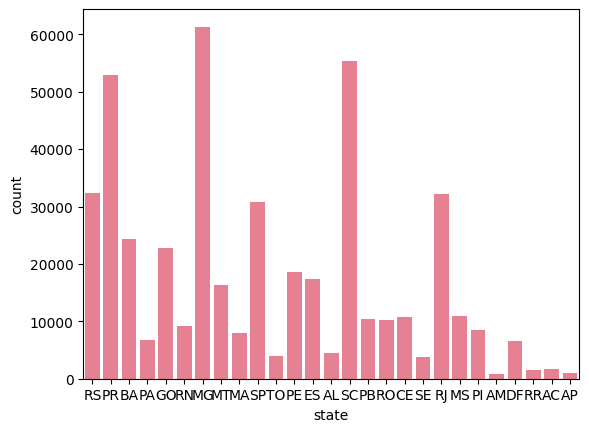

In [15]:
sns.countplot(x=df_orig['state'])

Датасет для обучения

In [16]:
df_train = df_orig[['week_day', 'hour', 'cause_of_accident', 'type_of_accident', 'wheather_condition', 'road_type', 'vehicles_involved', 'victims_condition']].copy()

In [17]:
df_train.head()

,week_day,hour,cause_of_accident,type_of_accident,wheather_condition,road_type,vehicles_involved,victims_condition
0,sunday,01:45:00,Mechanical loss/defect of vehicle,Rear-end collision,Clear sky,Simple,2,With injured victims
1,sunday,01:00:00,Incompatible velocity,Run-off-road,Drizzle,Double,2,With dead victims
2,sunday,04:40:00,Driver was sleeping,Head-on collision,Cloudy,Simple,2,With dead victims
3,sunday,06:30:00,Driver's lack of attention to conveyance,Side impact collision,Clear sky,Simple,3,With dead victims
4,sunday,09:00:00,Road's defect,Collision with fixed object,Clear sky,Simple,1,With injured victims


In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463152 entries, 0 to 463151
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   week_day            463152 non-null  object
 1   hour                463152 non-null  object
 2   cause_of_accident   463152 non-null  object
 3   type_of_accident    463152 non-null  object
 4   wheather_condition  463152 non-null  object
 5   road_type           463152 non-null  object
 6   vehicles_involved   463152 non-null  int64 
 7   victims_condition   463152 non-null  object
dtypes: int64(1), object(7)
memory usage: 28.3+ MB


In [19]:
df_train['week_day'].unique()

array(['sunday', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday',
       'saturday'], dtype=object)

In [20]:
def series_to_map_dict(ser):
    res_dict = {}

    val_arr = ser.unique()
    for num, val in zip(range(len(val_arr)), val_arr):
        res_dict[val] = num
    
    return res_dict

In [21]:
def string_timestamp_to_sec(inp_str):
    inp = inp_str.split(':')
    return int(inp[0])*3600 + int(inp[1])*60 + int(inp[2])

In [ ]:
df_mapped = df_train.copy()

df_mapped['wheather_condition'] = df_mapped['week_day'].map({'sunday': 6, 'monday': 0, 'tuesday': 1, 'wednesday': 2, 'thursday': 3, 'friday': 4, 'saturday': 5})

cause_of_accident_map = series_to_map_dict(df_mapped['cause_of_accident'])
type_of_accident_map = series_to_map_dict(df_mapped['type_of_accident'])
wheather_condition_map = series_to_map_dict(df_mapped['wheather_condition'])
road_type_map = series_to_map_dict(df_mapped['road_type'])
victims_condition_map = series_to_map_dict(df_mapped['victims_condition'])

df_mapped['cause_of_accident'] = df_mapped['cause_of_accident'].map(cause_of_accident_map)
df_mapped['type_of_accident'] = df_mapped['type_of_accident'].map(type_of_accident_map)
df_mapped['wheather_condition'] = df_mapped['wheather_condition'].map(wheather_condition_map)
df_mapped['road_type'] = df_mapped['road_type'].map(road_type_map)
df_mapped['victims_condition'] = df_mapped['victims_condition'].map(victims_condition_map)

df_mapped['hour'] = df_mapped['hour'].apply(lambda x: string_timestamp_to_sec(x))

df_mapped.head()

,week_day,hour,cause_of_accident,type_of_accident,wheather_condition,road_type,vehicles_involved,victims_condition
0,6,6300,0,0,0,0,2,0
1,6,3600,1,1,1,1,2,1
2,6,16800,2,2,2,0,2,1
3,6,23400,3,3,0,0,3,1
4,6,32400,4,4,0,0,1,0


In [23]:
df_mapped.isna().sum()

week_day              0
hour                  0
cause_of_accident     0
type_of_accident      0
wheather_condition    0
road_type             0
vehicles_involved     0
victims_condition     0
dtype: int64

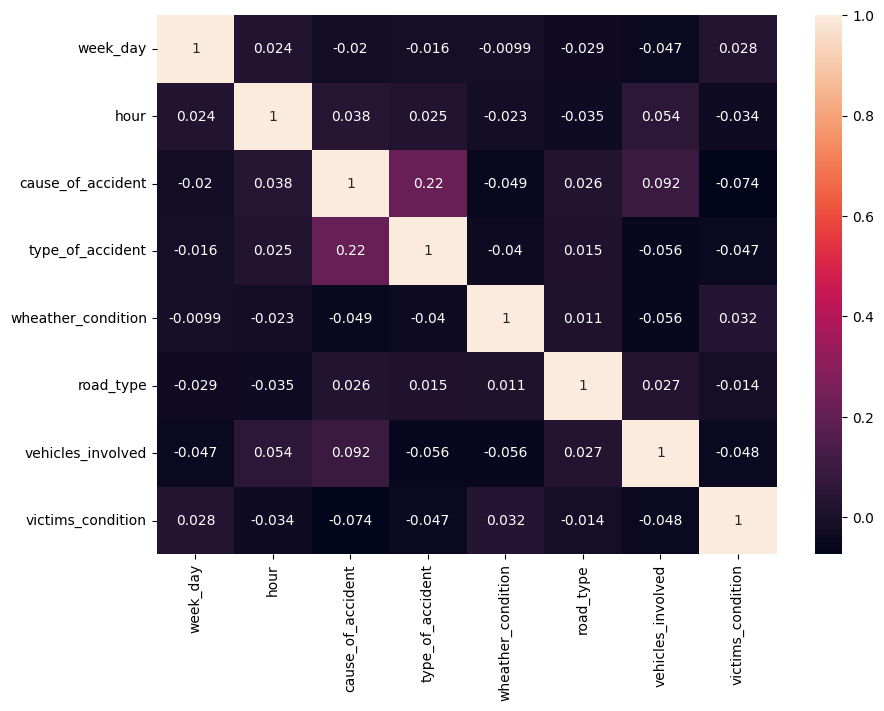

In [24]:
plt.figure(figsize=(10,7))
sns.heatmap(df_mapped.corr(numeric_only = True), annot=True)
plt.show()

### Разделение набора данных

In [25]:
X = df_mapped.drop(['victims_condition'], axis=1)
y = df_mapped['victims_condition']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (463152, 7) | y shape: (463152,) 


In [26]:
import scipy.stats as stats

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=15, stratify=y)

stats.ttest_ind(a=y_train, b=y_test)

TtestResult(statistic=np.float64(0.00043943752097186833), pvalue=np.float64(0.999649379787122), df=np.float64(463150.0))

In [27]:
models = []
#models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=40000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVC', SVC(gamma='auto')))

# оцениваем их метрики
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  # print(cv_results)
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LDA: 0.717285 (0.000009)
KNN: 0.691065 (0.001384)
CART: 0.635891 (0.001265)
NB: 0.717025 (0.000143)


NB и LDA

In [47]:
sk_lda = LinearDiscriminantAnalysis(solver='eigen')
sk_lda.fit(X_train, y_train)
sk_lda_pred_res = sk_lda.predict(X_test)
sk_transformed = sk_lda.transform(X_train)
sk_lda_accuracy = accuracy_score(y_test, sk_lda_pred_res)

print(f'sk LDA accuracy: {sk_lda_accuracy}')
print(f'sk LDA prediction: {sk_lda_pred_res}')
print('sk transformed features', sk_transformed[:5].T, sep='\n')

sk LDA accuracy: 0.7172976649285876
sk LDA prediction: [0 0 0 ... 0 0 0]
sk transformed features
[[ 3.83902628  0.60284798  1.96259944 -1.14087999  1.22937974]
 [ 1.08265154  0.07839675  2.12895425  1.4267244   2.74940782]]


In [32]:
len(sk_lda_pred_res)

92631

In [45]:
unique, counts = np.unique(sk_lda_pred_res, return_counts=True)
dict(zip(unique, counts))

{np.int64(0): np.int64(92630), np.int64(1): np.int64(1)}

In [49]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{np.int64(0): np.int64(66443),
 np.int64(1): np.int64(6269),
 np.int64(2): np.int64(19919)}